In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

In [25]:
# 예측할 종목은 한양증권(001750) 입니다
# 기간은 00-01-04 ~ 21-02-05 입니다
# Yahoo Finanace에서 다운로드 받습니다 
# null값과 0값을 제거한 데이터를 사용합니다


stock = pd.read_csv('C:\Jupyter_Project\Hanyang_Securities_F.csv')
df = stock.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6300,7100,6300,7000,1619.266357,56800
1,2000-01-05,6700,7100,6610,6700,1549.868774,52100
2,2000-01-06,7000,7000,6250,6300,1457.339844,64900
3,2000-01-07,6350,6600,6300,6370,1473.532349,61800
4,2000-01-10,6610,6700,6300,6500,1503.603882,56100


In [26]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5181,2021-02-01,9200,9480,9100,9380,9380.0,81355
5182,2021-02-02,9460,9810,9460,9700,9700.0,105755
5183,2021-02-03,9850,10200,9800,9990,9990.0,170966
5184,2021-02-04,10100,10200,9940,10150,10150.0,133504
5185,2021-02-05,10200,10800,10150,10650,10650.0,247224


In [27]:
# OHLC를 Adj OHLC로 바꾸기 위한 비율입니다
# Adj OHLC는 과거의 절대가격을 현재 가격의 시점으로 보기위한 수정된 가격입니다
# 과거 발생한 액면분할과 현금배당을 반영한 Adj Close를 기준으로 조정합니다

ratio = df['Adj Close']/df['Close']
ratio

0       0.231324
1       0.231324
2       0.231324
3       0.231324
4       0.231324
          ...   
5181    1.000000
5182    1.000000
5183    1.000000
5184    1.000000
5185    1.000000
Length: 5186, dtype: float64

In [28]:
df['Adj Open'] = df['Open']*ratio
df['Adj High'] = df['High']*ratio
df['Adj Low'] = df['Low']*ratio

In [29]:
df.drop(['Open','High','Low','Close'], axis=1, inplace=True)

In [30]:
df.rename(columns={'Adj Open':'Open', 'Adj High':'High', 'Adj Low':'Low', 'Adj Close':'Close'}, inplace=True)

In [31]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

df

,Open,High,Low,Close,Volume
0,1457.339721,1642.398734,1457.339721,1619.266357,56800
1,1549.868774,1642.398253,1529.049641,1549.868774,52100
2,1619.266493,1619.266493,1445.773655,1457.339844,64900
3,1468.905874,1526.736814,1457.339686,1473.532349,61800
4,1529.049486,1549.868617,1457.339147,1503.603882,56100
...,...,...,...,...,...
5181,9200.000000,9480.000000,9100.000000,9380.000000,81355
5182,9460.000000,9810.000000,9460.000000,9700.000000,105755
5183,9850.000000,10200.000000,9800.000000,9990.000000,170966
5184,10100.000000,10200.000000,9940.000000,10150.000000,133504


In [32]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

          Open      High       Low     Close    Volume
0     0.069093  0.078420  0.072692  0.082280  0.020301
1     0.076891  0.078420  0.078924  0.076473  0.018620
2     0.082740  0.076587  0.071686  0.068730  0.023197
3     0.070068  0.069256  0.072692  0.070085  0.022088
4     0.075136  0.071089  0.072692  0.072601  0.020050
...        ...       ...       ...       ...       ...
5181  0.721622  0.699387  0.736878  0.731697  0.029080
5182  0.743534  0.725532  0.768164  0.758474  0.037804
5183  0.776402  0.756432  0.797711  0.782742  0.061119
5184  0.797472  0.756432  0.809878  0.796130  0.047725
5185  0.805899  0.803969  0.828128  0.837970  0.088383

[5186 rows x 5 columns]


In [33]:
df= df_scaled

In [34]:
# Train과 Test를 분할합니다

from sklearn.model_selection import train_test_split

In [55]:
df

,Open,High,Low,Close,Volume
0,0.069093,0.078420,0.072692,0.082280,0.020301
1,0.076891,0.078420,0.078924,0.076473,0.018620
2,0.082740,0.076587,0.071686,0.068730,0.023197
3,0.070068,0.069256,0.072692,0.070085,0.022088
4,0.075136,0.071089,0.072692,0.072601,0.020050
...,...,...,...,...,...
5181,0.721622,0.699387,0.736878,0.731697,0.029080
5182,0.743534,0.725532,0.768164,0.758474,0.037804
5183,0.776402,0.756432,0.797711,0.782742,0.061119
5184,0.797472,0.756432,0.809878,0.796130,0.047725


In [56]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',1), df[['Close']], test_size=0.2, random_state=0, shuffle=False)

In [57]:
x_train.describe()

,Open,High,Low,Volume
count,4148.000000,4148.000000,4148.000000,4148.000000
mean,0.302584,0.288998,0.307214,0.023715
std,0.210424,0.202101,0.212263,0.044232
min,0.000000,0.000000,0.000000,0.000000
25%,0.064176,0.062598,0.064532,0.004319
50%,0.334388,0.316016,0.342133,0.010039
75%,0.441176,0.419268,0.450116,0.025088
max,1.000000,1.000000,1.000000,0.965361


In [58]:
x_test.describe()

,Open,High,Low,Volume
count,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.555800,0.526614,0.567003,0.012600
std,0.079535,0.076864,0.080384,0.036607
min,0.319620,0.315917,0.326686,0.000169
25%,0.502659,0.475656,0.513952,0.002769
50%,0.539503,0.509858,0.550272,0.005642
75%,0.568700,0.538621,0.580652,0.012338
max,0.831182,0.803969,0.828128,1.000000


In [59]:
y_train.describe()

,Close
count,4148.000000
mean,0.300445
std,0.208521
min,0.000000
25%,0.064271
50%,0.332450
75%,0.438175
max,1.000000


In [60]:
y_test.describe()

,Close
count,1038.000000
mean,0.551682
std,0.079335
min,0.314971
25%,0.498957
50%,0.535023
75%,0.565502
max,0.837970


In [61]:
# 정해진 window_size에 기반하여 20일 기간의 데이터 셋을 묶어준다

def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [62]:
from sklearn.model_selection import train_test_split


# train dataset
x_train, y_train = make_dataset(x_train, y_train, 20)

In [63]:
x_train.shape, y_train.shape

((4128, 20, 4), (4128, 1))

In [76]:
x_test, y_test = make_dataset(x_test, y_test, 20)

x_test.shape, y_test.shape

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(20, 
               input_shape=(x_test.shape[1], x_test.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [78]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2000      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 21        
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [79]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

def MPE(y_true, y_pred): 
    return K.mean((y_true - y_pred) / y_true) * 100
    
def MSLE(y_true, y_pred):
    return K.mean(K.square(K.log(y_true+1) - K.log(y_pred+1)), axis=-1)

def RMSLE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(y_true+1) - K.log(y_pred+1)), axis=-1))

def R2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

model.compile(optimizer='adam', loss= RMSE, metrics=[soft_acc, 'mse', 'mae', RMSE, 'mape', MPE, MSLE, RMSLE, R2])

In [82]:
x_test.shape

(1018, 20, 4)

In [80]:
# k-겹 교차 검증 실시
# 현재 10겹이므로 한번 실행마다 100번 반복하고 결국 1000번을 훈련하게 된다
# #0의 10개의 mae평균, #1의 10개의 mae평균,,,100번째의 10개의 mae평균,,,이렇게 500개의 mae를 구한다


k = 10

num_val_samples = len(x_train) // k 
num_epochs = 100
all_scores = []

all_RMSE_histories_train = []

all_RMSE_histories_valid = []

all_Soft_acc_histories_train = []

all_Soft_acc_histories_valid = []

for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    x_valid = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    y_valid = y_train[i * num_val_samples: (i + 1) * num_val_samples]
 
    # 훈련 데이터 준비: 다른 분할 전체
    partial_x_train = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
 
    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # model.fit()함수로 회귀 모델을 학습시킨다
    history = model.fit(partial_x_train, partial_y_train,
                        validation_data=(x_valid, y_valid),
                        epochs=num_epochs, batch_size=128, verbose=1)
    
    score_train = model.evaluate(partial_x_train, partial_y_train, batch_size=128)
    score_validation = model.evaluate(x_valid, y_valid, batch_size=128)

    RMSE_history_valid = history.history['val_loss']
    all_RMSE_histories_valid.append(RMSE_history_valid)
    
    RMSE_history_train = history.history['loss']
    all_RMSE_histories_train.append(RMSE_history_train)
    
    RMSE_history_train = history.history['soft_acc']
    all_Soft_acc_histories_train.append(RMSE_history_train)
    
    RMSE_history_valid = history.history['val_soft_acc']
    all_Soft_acc_histories_valid.append(RMSE_history_valid)
    
 
average_RMSE_valid = [np.mean([x[i] for x in all_RMSE_histories_valid]) for i in range(num_epochs)]

average_RMSE_train = [np.mean([x[i] for x in all_RMSE_histories_train]) for i in range(num_epochs)]

average_Soft_acc_train = [np.mean([x[i] for x in all_Soft_acc_histories_train]) for i in range(num_epochs)]

average_Soft_acc_valid = [np.mean([x[i] for x in all_Soft_acc_histories_valid]) for i in range(num_epochs)]

처리중인 폴드 # 0
Epoch 1/100
30/30 [==============================] - 3s 27ms/step - loss: 0.3102 - soft_acc: 0.8616 - mse: 0.0980 - mae: 0.2615 - RMSE: 0.3100 - mape: 76.2880 - MPE: 68.0181 - MSLE: 0.0607 - RMSLE: 0.2100 - R2: -50.3325 - val_loss: 0.0711 - val_soft_acc: 1.0000 - val_mse: 0.0051 - val_mae: 0.0700 - val_RMSE: 0.0717 - val_mape: 203464.1562 - val_MPE: -inf - val_MSLE: 0.0045 - val_RMSLE: 0.0659 - val_R2: -1245.3574
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1326 - soft_acc: 0.8756 - mse: 0.0188 - mae: 0.1111 - RMSE: 0.1326 - mape: 68.9132 - MPE: -30.7321 - MSLE: 0.0096 - RMSLE: 0.0836 - R2: -8.3069 - val_loss: 0.1305 - val_soft_acc: 1.0000 - val_mse: 0.0170 - val_mae: 0.1298 - val_RMSE: 0.1308 - val_mape: 330501.9688 - val_MPE: -inf - val_MSLE: 0.0142 - val_RMSLE: 0.1186 - val_R2: -4104.4468
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0725 - soft_acc: 0.9453 - mse: 0.0053 - mae: 0.0554 - RMSE: 0.0725 - mape: 71.50

30/30 [==============================] - 0s 4ms/step - loss: 0.0378 - soft_acc: 0.9634 - mse: 0.0014 - mae: 0.0210 - RMSE: 0.0378 - mape: 8.4389 - MPE: -2.2115 - MSLE: 6.1709e-04 - RMSLE: 0.0168 - R2: 0.2517 - val_loss: 0.0132 - val_soft_acc: 1.0000 - val_mse: 1.7848e-04 - val_mae: 0.0101 - val_RMSE: 0.0131 - val_mape: 13068.3506 - val_MPE: nan - val_MSLE: 1.6596e-04 - val_RMSLE: 0.0111 - val_R2: -35.5720
Epoch 21/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0385 - soft_acc: 0.9587 - mse: 0.0015 - mae: 0.0216 - RMSE: 0.0385 - mape: 8.5652 - MPE: -2.5743 - MSLE: 6.4512e-04 - RMSLE: 0.0171 - R2: 0.2380 - val_loss: 0.0131 - val_soft_acc: 1.0000 - val_mse: 1.7599e-04 - val_mae: 0.0099 - val_RMSE: 0.0129 - val_mape: 11154.4395 - val_MPE: nan - val_MSLE: 1.6384e-04 - val_RMSLE: 0.0110 - val_R2: -33.9773
Epoch 22/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0367 - soft_acc: 0.9597 - mse: 0.0014 - mae: 0.0202 - RMSE: 0.0366 - mape: 7.9991 - MPE: -0.9

30/30 [==============================] - 0s 5ms/step - loss: 0.0379 - soft_acc: 0.9616 - mse: 0.0015 - mae: 0.0210 - RMSE: 0.0379 - mape: 8.3741 - MPE: -0.7447 - MSLE: 6.3323e-04 - RMSLE: 0.0168 - R2: 0.2677 - val_loss: 0.0134 - val_soft_acc: 1.0000 - val_mse: 1.8547e-04 - val_mae: 0.0103 - val_RMSE: 0.0134 - val_mape: 16366.7637 - val_MPE: -inf - val_MSLE: 1.7210e-04 - val_RMSLE: 0.0114 - val_R2: -38.6513
Epoch 40/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0361 - soft_acc: 0.9620 - mse: 0.0013 - mae: 0.0207 - RMSE: 0.0361 - mape: 8.6107 - MPE: -2.9329 - MSLE: 5.7898e-04 - RMSLE: 0.0166 - R2: 0.3021 - val_loss: 0.0139 - val_soft_acc: 1.0000 - val_mse: 1.9709e-04 - val_mae: 0.0108 - val_RMSE: 0.0139 - val_mape: 20616.3809 - val_MPE: -inf - val_MSLE: 1.8269e-04 - val_RMSLE: 0.0118 - val_R2: -43.0129
Epoch 41/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0371 - soft_acc: 0.9570 - mse: 0.0014 - mae: 0.0212 - RMSE: 0.0370 - mape: 8.9219 - MPE: -3

30/30 [==============================] - 0s 4ms/step - loss: 0.0361 - soft_acc: 0.9640 - mse: 0.0013 - mae: 0.0202 - RMSE: 0.0361 - mape: 8.4210 - MPE: -2.5854 - MSLE: 5.7620e-04 - RMSLE: 0.0161 - R2: 0.3124 - val_loss: 0.0138 - val_soft_acc: 1.0000 - val_mse: 1.9488e-04 - val_mae: 0.0104 - val_RMSE: 0.0137 - val_mape: 15302.0342 - val_MPE: -inf - val_MSLE: 1.8036e-04 - val_RMSLE: 0.0117 - val_R2: -40.1333
Epoch 59/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0385 - soft_acc: 0.9611 - mse: 0.0015 - mae: 0.0212 - RMSE: 0.0385 - mape: 8.4193 - MPE: -2.8391 - MSLE: 6.4133e-04 - RMSLE: 0.0169 - R2: 0.2288 - val_loss: 0.0141 - val_soft_acc: 1.0000 - val_mse: 2.0323e-04 - val_mae: 0.0107 - val_RMSE: 0.0140 - val_mape: 17223.0156 - val_MPE: -inf - val_MSLE: 1.8792e-04 - val_RMSLE: 0.0119 - val_R2: -42.8163
Epoch 60/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0367 - soft_acc: 0.9602 - mse: 0.0014 - mae: 0.0210 - RMSE: 0.0367 - mape: 8.5505 - MPE: -2

30/30 [==============================] - 0s 5ms/step - loss: 0.0353 - soft_acc: 0.9558 - mse: 0.0013 - mae: 0.0207 - RMSE: 0.0353 - mape: 8.7351 - MPE: -2.4933 - MSLE: 5.5112e-04 - RMSLE: 0.0166 - R2: 0.3629 - val_loss: 0.0135 - val_soft_acc: 1.0000 - val_mse: 1.8739e-04 - val_mae: 0.0099 - val_RMSE: 0.0131 - val_mape: 5362.5581 - val_MPE: nan - val_MSLE: 1.7404e-04 - val_RMSLE: 0.0112 - val_R2: -34.4577
Epoch 78/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0363 - soft_acc: 0.9556 - mse: 0.0013 - mae: 0.0206 - RMSE: 0.0363 - mape: 8.3902 - MPE: -0.6240 - MSLE: 5.8242e-04 - RMSLE: 0.0165 - R2: 0.3059 - val_loss: 0.0141 - val_soft_acc: 1.0000 - val_mse: 2.0282e-04 - val_mae: 0.0104 - val_RMSE: 0.0138 - val_mape: 13211.5605 - val_MPE: -inf - val_MSLE: 1.8733e-04 - val_RMSLE: 0.0118 - val_R2: -40.8706
Epoch 79/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0370 - soft_acc: 0.9620 - mse: 0.0014 - mae: 0.0206 - RMSE: 0.0370 - mape: 8.2340 - MPE: -0.0

30/30 [==============================] - 0s 4ms/step - loss: 0.0370 - soft_acc: 0.9641 - mse: 0.0014 - mae: 0.0206 - RMSE: 0.0369 - mape: 7.7999 - MPE: -1.6442 - MSLE: 5.9627e-04 - RMSLE: 0.0164 - R2: 0.2642 - val_loss: 0.0142 - val_soft_acc: 1.0000 - val_mse: 2.0761e-04 - val_mae: 0.0105 - val_RMSE: 0.0140 - val_mape: 11948.7012 - val_MPE: -inf - val_MSLE: 1.9156e-04 - val_RMSLE: 0.0119 - val_R2: -41.3656
Epoch 97/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0350 - soft_acc: 0.9606 - mse: 0.0013 - mae: 0.0196 - RMSE: 0.0350 - mape: 7.7399 - MPE: -1.7726 - MSLE: 5.5280e-04 - RMSLE: 0.0158 - R2: 0.3253 - val_loss: 0.0138 - val_soft_acc: 1.0000 - val_mse: 1.9663e-04 - val_mae: 0.0100 - val_RMSE: 0.0135 - val_mape: 6824.5796 - val_MPE: nan - val_MSLE: 1.8193e-04 - val_RMSLE: 0.0115 - val_R2: -37.2641
Epoch 98/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0351 - soft_acc: 0.9643 - mse: 0.0013 - mae: 0.0199 - RMSE: 0.0351 - mape: 7.8073 - MPE: -0.5

30/30 [==============================] - 0s 5ms/step - loss: 0.0387 - soft_acc: 0.9632 - mse: 0.0015 - mae: 0.0218 - RMSE: 0.0387 - mape: 521.9192 - MPE: -inf - MSLE: 6.6635e-04 - RMSLE: 0.0175 - R2: 0.2509 - val_loss: 0.0131 - val_soft_acc: 1.0000 - val_mse: 1.9308e-04 - val_mae: 0.0102 - val_RMSE: 0.0125 - val_mape: 18.5800 - val_MPE: -1.6189 - val_MSLE: 1.6507e-04 - val_RMSLE: 0.0109 - val_R2: -23.3597
Epoch 15/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0375 - soft_acc: 0.9630 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0375 - mape: 574.0285 - MPE: -inf - MSLE: 6.1383e-04 - RMSLE: 0.0168 - R2: 0.3100 - val_loss: 0.0128 - val_soft_acc: 1.0000 - val_mse: 1.8445e-04 - val_mae: 0.0100 - val_RMSE: 0.0123 - val_mape: 18.2525 - val_MPE: -0.6899 - val_MSLE: 1.5804e-04 - val_RMSLE: 0.0107 - val_R2: -23.0398
Epoch 16/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0381 - soft_acc: 0.9619 - mse: 0.0015 - mae: 0.0212 - RMSE: 0.0381 - mape: 745.0779 - MPE: -i

30/30 [==============================] - 0s 4ms/step - loss: 0.0385 - soft_acc: 0.9643 - mse: 0.0015 - mae: 0.0214 - RMSE: 0.0385 - mape: 505.3675 - MPE: -inf - MSLE: 6.5080e-04 - RMSLE: 0.0171 - R2: 0.2690 - val_loss: 0.0131 - val_soft_acc: 1.0000 - val_mse: 1.9179e-04 - val_mae: 0.0101 - val_RMSE: 0.0123 - val_mape: 18.4179 - val_MPE: -4.8434 - val_MSLE: 1.6349e-04 - val_RMSLE: 0.0108 - val_R2: -21.3463
Epoch 34/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0379 - soft_acc: 0.9558 - mse: 0.0015 - mae: 0.0219 - RMSE: 0.0378 - mape: 2847.7276 - MPE: -inf - MSLE: 6.3687e-04 - RMSLE: 0.0174 - R2: 0.2742 - val_loss: 0.0119 - val_soft_acc: 1.0000 - val_mse: 1.6229e-04 - val_mae: 0.0093 - val_RMSE: 0.0117 - val_mape: 16.8951 - val_MPE: 3.4175 - val_MSLE: 1.3968e-04 - val_RMSLE: 0.0100 - val_R2: -22.8750
Epoch 35/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0395 - soft_acc: 0.9564 - mse: 0.0016 - mae: 0.0221 - RMSE: 0.0394 - mape: 1946.4118 - MPE: -

30/30 [==============================] - 0s 4ms/step - loss: 0.0388 - soft_acc: 0.9637 - mse: 0.0015 - mae: 0.0218 - RMSE: 0.0387 - mape: 973.7104 - MPE: -inf - MSLE: 6.4331e-04 - RMSLE: 0.0173 - R2: 0.2560 - val_loss: 0.0122 - val_soft_acc: 1.0000 - val_mse: 1.6713e-04 - val_mae: 0.0094 - val_RMSE: 0.0116 - val_mape: 17.1235 - val_MPE: -1.5612 - val_MSLE: 1.4314e-04 - val_RMSLE: 0.0101 - val_R2: -20.2814
Epoch 53/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0380 - soft_acc: 0.9647 - mse: 0.0015 - mae: 0.0212 - RMSE: 0.0380 - mape: 1734.6844 - MPE: -inf - MSLE: 6.4192e-04 - RMSLE: 0.0170 - R2: 0.2467 - val_loss: 0.0122 - val_soft_acc: 1.0000 - val_mse: 1.6615e-04 - val_mae: 0.0094 - val_RMSE: 0.0116 - val_mape: 17.1914 - val_MPE: -2.0193 - val_MSLE: 1.4241e-04 - val_RMSLE: 0.0101 - val_R2: -20.0707
Epoch 54/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0374 - soft_acc: 0.9622 - mse: 0.0014 - mae: 0.0210 - RMSE: 0.0374 - mape: 495.9293 - MPE: -

30/30 [==============================] - 0s 4ms/step - loss: 0.0370 - soft_acc: 0.9645 - mse: 0.0014 - mae: 0.0207 - RMSE: 0.0370 - mape: 679.4863 - MPE: -inf - MSLE: 6.0583e-04 - RMSLE: 0.0166 - R2: 0.3130 - val_loss: 0.0115 - val_soft_acc: 1.0000 - val_mse: 1.5408e-04 - val_mae: 0.0090 - val_RMSE: 0.0113 - val_mape: 16.2756 - val_MPE: 3.1067 - val_MSLE: 1.3279e-04 - val_RMSLE: 0.0097 - val_R2: -21.0421
Epoch 72/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0364 - soft_acc: 0.9668 - mse: 0.0014 - mae: 0.0202 - RMSE: 0.0364 - mape: 3758.0001 - MPE: -inf - MSLE: 5.8162e-04 - RMSLE: 0.0161 - R2: 0.3316 - val_loss: 0.0125 - val_soft_acc: 1.0000 - val_mse: 1.7165e-04 - val_mae: 0.0096 - val_RMSE: 0.0116 - val_mape: 17.6962 - val_MPE: -4.9370 - val_MSLE: 1.4693e-04 - val_RMSLE: 0.0102 - val_R2: -19.1000
Epoch 73/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0370 - soft_acc: 0.9628 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0370 - mape: 546.8685 - MPE: -i

30/30 [==============================] - 0s 4ms/step - loss: 0.0378 - soft_acc: 0.9644 - mse: 0.0015 - mae: 0.0211 - RMSE: 0.0378 - mape: 3048.4644 - MPE: -inf - MSLE: 6.2682e-04 - RMSLE: 0.0168 - R2: 0.2852 - val_loss: 0.0119 - val_soft_acc: 1.0000 - val_mse: 1.5982e-04 - val_mae: 0.0091 - val_RMSE: 0.0113 - val_mape: 16.6255 - val_MPE: -1.8801 - val_MSLE: 1.3693e-04 - val_RMSLE: 0.0098 - val_R2: -18.5282
Epoch 91/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0367 - soft_acc: 0.9612 - mse: 0.0014 - mae: 0.0208 - RMSE: 0.0366 - mape: 2749.3268 - MPE: -inf - MSLE: 5.9270e-04 - RMSLE: 0.0167 - R2: 0.3197 - val_loss: 0.0116 - val_soft_acc: 1.0000 - val_mse: 1.5371e-04 - val_mae: 0.0089 - val_RMSE: 0.0112 - val_mape: 16.1753 - val_MPE: 0.8486 - val_MSLE: 1.3207e-04 - val_RMSLE: 0.0096 - val_R2: -19.1872
Epoch 92/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0377 - soft_acc: 0.9666 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0376 - mape: 3085.5474 - MPE: 

30/30 [==============================] - 0s 4ms/step - loss: 0.0383 - soft_acc: 0.9595 - mse: 0.0015 - mae: 0.0220 - RMSE: 0.0383 - mape: 260.7983 - MPE: inf - MSLE: 6.4891e-04 - RMSLE: 0.0178 - R2: 0.2547 - val_loss: 0.0064 - val_soft_acc: 1.0000 - val_mse: 5.4930e-05 - val_mae: 0.0048 - val_RMSE: 0.0091 - val_mape: 12.2902 - val_MPE: 3.5855 - val_MSLE: 4.8449e-05 - val_RMSLE: 0.0053 - val_R2: -12.2418
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0378 - soft_acc: 0.9631 - mse: 0.0015 - mae: 0.0219 - RMSE: 0.0379 - mape: 453.6724 - MPE: inf - MSLE: 6.3126e-04 - RMSLE: 0.0177 - R2: 0.2821 - val_loss: 0.0069 - val_soft_acc: 1.0000 - val_mse: 6.6157e-05 - val_mae: 0.0054 - val_RMSE: 0.0099 - val_mape: 13.7733 - val_MPE: 9.3372 - val_MSLE: 5.8523e-05 - val_RMSLE: 0.0058 - val_R2: -13.8232
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0379 - soft_acc: 0.9652 - mse: 0.0015 - mae: 0.0215 - RMSE: 0.0379 - mape: 1331.8310 - MPE: nan - 

30/30 [==============================] - 0s 4ms/step - loss: 0.0365 - soft_acc: 0.9622 - mse: 0.0014 - mae: 0.0210 - RMSE: 0.0365 - mape: 850.9225 - MPE: nan - MSLE: 5.8432e-04 - RMSLE: 0.0170 - R2: 0.3219 - val_loss: 0.0065 - val_soft_acc: 1.0000 - val_mse: 5.5861e-05 - val_mae: 0.0049 - val_RMSE: 0.0092 - val_mape: 12.8888 - val_MPE: -1.2653 - val_MSLE: 4.9272e-05 - val_RMSLE: 0.0053 - val_R2: -13.5809
Epoch 28/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0369 - soft_acc: 0.9573 - mse: 0.0014 - mae: 0.0214 - RMSE: 0.0369 - mape: 296.7108 - MPE: nan - MSLE: 6.1240e-04 - RMSLE: 0.0173 - R2: 0.2845 - val_loss: 0.0064 - val_soft_acc: 1.0000 - val_mse: 5.5673e-05 - val_mae: 0.0047 - val_RMSE: 0.0092 - val_mape: 11.9902 - val_MPE: 1.7120 - val_MSLE: 4.8948e-05 - val_RMSLE: 0.0051 - val_R2: -12.6033
Epoch 29/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0393 - soft_acc: 0.9609 - mse: 0.0016 - mae: 0.0221 - RMSE: 0.0393 - mape: 107.5641 - MPE: nan -

30/30 [==============================] - 0s 4ms/step - loss: 0.0377 - soft_acc: 0.9601 - mse: 0.0014 - mae: 0.0217 - RMSE: 0.0377 - mape: 4564.8633 - MPE: -inf - MSLE: 6.3576e-04 - RMSLE: 0.0175 - R2: 0.2510 - val_loss: 0.0067 - val_soft_acc: 1.0000 - val_mse: 6.6632e-05 - val_mae: 0.0052 - val_RMSE: 0.0099 - val_mape: 12.7089 - val_MPE: 8.4135 - val_MSLE: 5.8601e-05 - val_RMSLE: 0.0055 - val_R2: -13.6871
Epoch 47/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0368 - soft_acc: 0.9629 - mse: 0.0014 - mae: 0.0208 - RMSE: 0.0369 - mape: 1265.8692 - MPE: -inf - MSLE: 6.0487e-04 - RMSLE: 0.0168 - R2: 0.2723 - val_loss: 0.0066 - val_soft_acc: 1.0000 - val_mse: 6.4451e-05 - val_mae: 0.0050 - val_RMSE: 0.0098 - val_mape: 12.2504 - val_MPE: 7.2838 - val_MSLE: 5.6596e-05 - val_RMSLE: 0.0054 - val_R2: -13.3000
Epoch 48/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0378 - soft_acc: 0.9597 - mse: 0.0015 - mae: 0.0215 - RMSE: 0.0378 - mape: 154.1547 - MPE: na

30/30 [==============================] - 0s 4ms/step - loss: 0.0375 - soft_acc: 0.9644 - mse: 0.0014 - mae: 0.0210 - RMSE: 0.0375 - mape: 314.4025 - MPE: -inf - MSLE: 6.1903e-04 - RMSLE: 0.0170 - R2: 0.2723 - val_loss: 0.0064 - val_soft_acc: 1.0000 - val_mse: 5.8246e-05 - val_mae: 0.0048 - val_RMSE: 0.0094 - val_mape: 12.1159 - val_MPE: 1.1317 - val_MSLE: 5.1138e-05 - val_RMSLE: 0.0052 - val_R2: -13.1738
Epoch 66/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0367 - soft_acc: 0.9617 - mse: 0.0014 - mae: 0.0211 - RMSE: 0.0368 - mape: 214.3985 - MPE: -inf - MSLE: 6.0406e-04 - RMSLE: 0.0170 - R2: 0.2633 - val_loss: 0.0068 - val_soft_acc: 1.0000 - val_mse: 6.9836e-05 - val_mae: 0.0053 - val_RMSE: 0.0102 - val_mape: 12.8614 - val_MPE: 9.1050 - val_MSLE: 6.1397e-05 - val_RMSLE: 0.0056 - val_R2: -14.2213
Epoch 67/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0370 - soft_acc: 0.9623 - mse: 0.0014 - mae: 0.0213 - RMSE: 0.0370 - mape: 2848.6584 - MPE: -in

30/30 [==============================] - 0s 5ms/step - loss: 0.0369 - soft_acc: 0.9642 - mse: 0.0014 - mae: 0.0211 - RMSE: 0.0368 - mape: 570.5959 - MPE: -inf - MSLE: 5.9279e-04 - RMSLE: 0.0170 - R2: 0.3174 - val_loss: 0.0064 - val_soft_acc: 1.0000 - val_mse: 6.1820e-05 - val_mae: 0.0049 - val_RMSE: 0.0096 - val_mape: 11.9122 - val_MPE: 5.8622 - val_MSLE: 5.4253e-05 - val_RMSLE: 0.0053 - val_R2: -12.9140
Epoch 85/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0379 - soft_acc: 0.9640 - mse: 0.0015 - mae: 0.0213 - RMSE: 0.0379 - mape: 1793.2435 - MPE: -inf - MSLE: 6.2989e-04 - RMSLE: 0.0171 - R2: 0.2556 - val_loss: 0.0064 - val_soft_acc: 1.0000 - val_mse: 6.1075e-05 - val_mae: 0.0048 - val_RMSE: 0.0096 - val_mape: 11.7887 - val_MPE: 5.2288 - val_MSLE: 5.3572e-05 - val_RMSLE: 0.0052 - val_R2: -12.8447
Epoch 86/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0354 - soft_acc: 0.9663 - mse: 0.0013 - mae: 0.0206 - RMSE: 0.0355 - mape: 240.6195 - MPE: -in

30/30 [==============================] - 0s 6ms/step - loss: 0.2037 - soft_acc: 0.8600 - mse: 0.0423 - mae: 0.1721 - RMSE: 0.2035 - mape: 34708.7201 - MPE: -inf - MSLE: 0.0229 - RMSLE: 0.1321 - R2: -17.4019 - val_loss: 0.0569 - val_soft_acc: 1.0000 - val_mse: 0.0040 - val_mae: 0.0513 - val_RMSE: 0.0519 - val_mape: 38.6069 - val_MPE: -25.5680 - val_MSLE: 0.0029 - val_RMSLE: 0.0434 - val_R2: -47.9035
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 0.1078 - soft_acc: 0.9002 - mse: 0.0119 - mae: 0.0881 - RMSE: 0.1078 - mape: 5395.0326 - MPE: -inf - MSLE: 0.0070 - RMSLE: 0.0693 - R2: -3.9852 - val_loss: 0.0672 - val_soft_acc: 1.0000 - val_mse: 0.0046 - val_mae: 0.0617 - val_RMSE: 0.0616 - val_mape: 38.4122 - val_MPE: -32.4284 - val_MSLE: 0.0031 - val_RMSLE: 0.0512 - val_R2: -49.7682
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0530 - soft_acc: 0.9422 - mse: 0.0029 - mae: 0.0384 - RMSE: 0.0531 - mape: 11566.9249 - MPE: -inf - MSLE: 0.001

Epoch 22/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0346 - soft_acc: 0.9661 - mse: 0.0012 - mae: 0.0192 - RMSE: 0.0346 - mape: 885.8378 - MPE: inf - MSLE: 5.2629e-04 - RMSLE: 0.0156 - R2: 0.4695 - val_loss: 0.0324 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0241 - val_RMSE: 0.0311 - val_mape: 11.8447 - val_MPE: -4.1236 - val_MSLE: 6.8866e-04 - val_RMSLE: 0.0217 - val_R2: -11.0556
Epoch 23/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0364 - soft_acc: 0.9644 - mse: 0.0014 - mae: 0.0198 - RMSE: 0.0364 - mape: 262.7012 - MPE: nan - MSLE: 5.7612e-04 - RMSLE: 0.0159 - R2: 0.4133 - val_loss: 0.0314 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0229 - val_RMSE: 0.0309 - val_mape: 10.7116 - val_MPE: -0.0472 - val_MSLE: 6.5036e-04 - val_RMSLE: 0.0210 - val_R2: -11.4850
Epoch 24/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0338 - soft_acc: 0.9605 - mse: 0.0012 - mae: 0.0190 - RMSE: 0.0338 - mape: 3970.0435 - MPE

Epoch 42/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0347 - soft_acc: 0.9643 - mse: 0.0012 - mae: 0.0188 - RMSE: 0.0347 - mape: 306.7331 - MPE: nan - MSLE: 5.2403e-04 - RMSLE: 0.0151 - R2: 0.4788 - val_loss: 0.0321 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0238 - val_RMSE: 0.0309 - val_mape: 11.5113 - val_MPE: -3.4518 - val_MSLE: 6.7964e-04 - val_RMSLE: 0.0214 - val_R2: -10.9637
Epoch 43/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0371 - soft_acc: 0.9540 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0371 - mape: 1133.5383 - MPE: inf - MSLE: 5.9737e-04 - RMSLE: 0.0166 - R2: 0.3976 - val_loss: 0.0315 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0229 - val_RMSE: 0.0310 - val_mape: 10.6925 - val_MPE: 0.1880 - val_MSLE: 6.5336e-04 - val_RMSLE: 0.0210 - val_R2: -11.5819
Epoch 44/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0364 - soft_acc: 0.9550 - mse: 0.0013 - mae: 0.0201 - RMSE: 0.0364 - mape: 116.2058 - MPE:

Epoch 62/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0336 - soft_acc: 0.9629 - mse: 0.0012 - mae: 0.0182 - RMSE: 0.0336 - mape: 1302.9506 - MPE: nan - MSLE: 4.9853e-04 - RMSLE: 0.0148 - R2: 0.4722 - val_loss: 0.0314 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0229 - val_RMSE: 0.0309 - val_mape: 10.6791 - val_MPE: 0.2674 - val_MSLE: 6.5210e-04 - val_RMSLE: 0.0210 - val_R2: -11.4891
Epoch 63/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0333 - soft_acc: 0.9628 - mse: 0.0011 - mae: 0.0184 - RMSE: 0.0332 - mape: 282.6521 - MPE: nan - MSLE: 4.8418e-04 - RMSLE: 0.0150 - R2: 0.5119 - val_loss: 0.0315 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0230 - val_RMSE: 0.0308 - val_mape: 10.7501 - val_MPE: -0.4272 - val_MSLE: 6.5528e-04 - val_RMSLE: 0.0210 - val_R2: -11.2284
Epoch 64/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0341 - soft_acc: 0.9613 - mse: 0.0012 - mae: 0.0185 - RMSE: 0.0341 - mape: 206.1659 - MPE:

Epoch 82/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0342 - soft_acc: 0.9556 - mse: 0.0012 - mae: 0.0188 - RMSE: 0.0342 - mape: 107.6790 - MPE: nan - MSLE: 5.1200e-04 - RMSLE: 0.0152 - R2: 0.4779 - val_loss: 0.0315 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0231 - val_RMSE: 0.0307 - val_mape: 10.8935 - val_MPE: -1.3894 - val_MSLE: 6.5480e-04 - val_RMSLE: 0.0210 - val_R2: -11.0204
Epoch 83/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0361 - soft_acc: 0.9615 - mse: 0.0013 - mae: 0.0193 - RMSE: 0.0361 - mape: 356.4177 - MPE: nan - MSLE: 5.5901e-04 - RMSLE: 0.0155 - R2: 0.4259 - val_loss: 0.0315 - val_soft_acc: 1.0000 - val_mse: 0.0011 - val_mae: 0.0231 - val_RMSE: 0.0309 - val_mape: 10.7524 - val_MPE: 0.2203 - val_MSLE: 6.5550e-04 - val_RMSLE: 0.0211 - val_R2: -11.4156
Epoch 84/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0348 - soft_acc: 0.9615 - mse: 0.0012 - mae: 0.0189 - RMSE: 0.0348 - mape: 1043.3927 - MPE:

4/4 [==============================] - 0s 3ms/step - loss: 0.0315 - soft_acc: 1.0000 - mse: 0.0011 - mae: 0.0231 - RMSE: 0.0308 - mape: 10.7912 - MPE: -0.3420 - MSLE: 6.5595e-04 - RMSLE: 0.0211 - R2: -11.2422
처리중인 폴드 # 4
Epoch 1/100
30/30 [==============================] - 3s 27ms/step - loss: 0.0292 - soft_acc: 0.9602 - mse: 8.7404e-04 - mae: 0.0193 - RMSE: 0.0291 - mape: 423.7327 - MPE: nan - MSLE: 4.7119e-04 - RMSLE: 0.0165 - R2: 0.4407 - val_loss: 0.0795 - val_soft_acc: 0.9795 - val_mse: 0.0070 - val_mae: 0.0620 - val_RMSE: 0.0820 - val_mape: 9.3597 - val_MPE: -0.5370 - val_MSLE: 0.0024 - val_RMSLE: 0.0425 - val_R2: -19.5595
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0252 - soft_acc: 0.9696 - mse: 6.5050e-04 - mae: 0.0149 - RMSE: 0.0252 - mape: 670.6176 - MPE: nan - MSLE: 3.4972e-04 - RMSLE: 0.0131 - R2: 0.5838 - val_loss: 0.0785 - val_soft_acc: 0.9795 - val_mse: 0.0068 - val_mae: 0.0611 - val_RMSE: 0.0801 - val_mape: 9.1959 - val_MPE: -0.0120 - val_

30/30 [==============================] - 0s 4ms/step - loss: 0.0264 - soft_acc: 0.9634 - mse: 7.1229e-04 - mae: 0.0162 - RMSE: 0.0264 - mape: 483.6814 - MPE: -inf - MSLE: 3.7876e-04 - RMSLE: 0.0139 - R2: 0.5434 - val_loss: 0.0801 - val_soft_acc: 0.9775 - val_mse: 0.0072 - val_mae: 0.0621 - val_RMSE: 0.0786 - val_mape: 9.2042 - val_MPE: 2.8417 - val_MSLE: 0.0025 - val_RMSLE: 0.0418 - val_R2: -17.8018
Epoch 21/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0260 - soft_acc: 0.9638 - mse: 6.9664e-04 - mae: 0.0158 - RMSE: 0.0261 - mape: 1132.3387 - MPE: nan - MSLE: 3.7151e-04 - RMSLE: 0.0136 - R2: 0.5496 - val_loss: 0.0860 - val_soft_acc: 0.9717 - val_mse: 0.0083 - val_mae: 0.0673 - val_RMSE: 0.0829 - val_mape: 9.9464 - val_MPE: 5.0569 - val_MSLE: 0.0029 - val_RMSLE: 0.0449 - val_R2: -20.2102
Epoch 22/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0257 - soft_acc: 0.9596 - mse: 6.6875e-04 - mae: 0.0155 - RMSE: 0.0256 - mape: 461.9516 - MPE: nan - MSLE

Epoch 40/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0251 - soft_acc: 0.9636 - mse: 6.4375e-04 - mae: 0.0153 - RMSE: 0.0251 - mape: 2617.9568 - MPE: -inf - MSLE: 3.4705e-04 - RMSLE: 0.0132 - R2: 0.5906 - val_loss: 0.0855 - val_soft_acc: 0.9736 - val_mse: 0.0082 - val_mae: 0.0667 - val_RMSE: 0.0828 - val_mape: 9.7849 - val_MPE: 4.9902 - val_MSLE: 0.0029 - val_RMSLE: 0.0443 - val_R2: -19.9448
Epoch 41/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0256 - soft_acc: 0.9616 - mse: 6.7983e-04 - mae: 0.0154 - RMSE: 0.0256 - mape: 183.0895 - MPE: nan - MSLE: 3.6319e-04 - RMSLE: 0.0132 - R2: 0.5715 - val_loss: 0.0818 - val_soft_acc: 0.9775 - val_mse: 0.0076 - val_mae: 0.0635 - val_RMSE: 0.0799 - val_mape: 9.3383 - val_MPE: 3.6966 - val_MSLE: 0.0026 - val_RMSLE: 0.0424 - val_R2: -18.3464
Epoch 42/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0262 - soft_acc: 0.9627 - mse: 6.9408e-04 - mae: 0.0160 - RMSE: 0.0262 - mape: 1204.6341 - M

Epoch 60/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0257 - soft_acc: 0.9595 - mse: 6.7394e-04 - mae: 0.0153 - RMSE: 0.0257 - mape: 3182.4428 - MPE: -inf - MSLE: 3.5983e-04 - RMSLE: 0.0133 - R2: 0.5427 - val_loss: 0.0894 - val_soft_acc: 0.9736 - val_mse: 0.0091 - val_mae: 0.0702 - val_RMSE: 0.0871 - val_mape: 10.1925 - val_MPE: 6.2638 - val_MSLE: 0.0032 - val_RMSLE: 0.0461 - val_R2: -21.9119
Epoch 61/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0255 - soft_acc: 0.9612 - mse: 6.6538e-04 - mae: 0.0152 - RMSE: 0.0255 - mape: 300.1563 - MPE: -inf - MSLE: 3.6369e-04 - RMSLE: 0.0132 - R2: 0.5372 - val_loss: 0.0853 - val_soft_acc: 0.9775 - val_mse: 0.0083 - val_mae: 0.0664 - val_RMSE: 0.0833 - val_mape: 9.6768 - val_MPE: 5.0458 - val_MSLE: 0.0029 - val_RMSLE: 0.0438 - val_R2: -19.9692
Epoch 62/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0248 - soft_acc: 0.9629 - mse: 6.2398e-04 - mae: 0.0148 - RMSE: 0.0248 - mape: 377.1814 - 

Epoch 80/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0243 - soft_acc: 0.9632 - mse: 5.9621e-04 - mae: 0.0147 - RMSE: 0.0242 - mape: 666.0756 - MPE: -inf - MSLE: 3.2065e-04 - RMSLE: 0.0127 - R2: 0.6181 - val_loss: 0.1042 - val_soft_acc: 0.9697 - val_mse: 0.0126 - val_mae: 0.0848 - val_RMSE: 0.1037 - val_mape: 12.0696 - val_MPE: 10.0455 - val_MSLE: 0.0044 - val_RMSLE: 0.0542 - val_R2: -30.9213
Epoch 81/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0241 - soft_acc: 0.9621 - mse: 5.9297e-04 - mae: 0.0149 - RMSE: 0.0241 - mape: 3782.5695 - MPE: -inf - MSLE: 3.2512e-04 - RMSLE: 0.0129 - R2: 0.6195 - val_loss: 0.1008 - val_soft_acc: 0.9736 - val_mse: 0.0118 - val_mae: 0.0813 - val_RMSE: 0.1001 - val_mape: 11.5719 - val_MPE: 9.2383 - val_MSLE: 0.0041 - val_RMSLE: 0.0521 - val_R2: -28.7674
Epoch 82/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0253 - soft_acc: 0.9601 - mse: 6.5400e-04 - mae: 0.0152 - RMSE: 0.0253 - mape: 3042.9263

Epoch 100/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1133 - soft_acc: 0.9795 - mse: 0.0153 - mae: 0.0944 - RMSE: 0.1157 - mape: 13.2283 - MPE: 11.8038 - MSLE: 0.0053 - RMSLE: 0.0593 - R2: -38.3852
처리중인 폴드 # 5
Epoch 1/100
30/30 [==============================] - 2s 23ms/step - loss: 0.1940 - soft_acc: 0.8950 - mse: 0.0402 - mae: 0.1543 - RMSE: 0.1938 - mape: 6371.2572 - MPE: -inf - MSLE: 0.0226 - RMSLE: 0.1193 - R2: -17.3319 - val_loss: 0.0554 - val_soft_acc: 0.8115 - val_mse: 0.0033 - val_mae: 0.0455 - val_RMSE: 0.0491 - val_mape: 11.4055 - val_MPE: 1.1823 - val_MSLE: 0.0016 - val_RMSLE: 0.0347 - val_R2: -22.3420
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0613 - soft_acc: 0.9726 - mse: 0.0038 - mae: 0.0481 - RMSE: 0.0612 - mape: 1968.1602 - MPE: -inf - MSLE: 0.0026 - RMSLE: 0.0407 - R2: -0.7593 - val_loss: 0.0515 - val_soft_acc: 0.8451 - val_mse: 0.0030 - val_mae: 0.0403 - val_RMSE: 0.0449 - val_mape: 10.2726 - val_MPE: -0.3001 - va

Epoch 19/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0327 - soft_acc: 0.9794 - mse: 0.0011 - mae: 0.0186 - RMSE: 0.0328 - mape: 441.2445 - MPE: nan - MSLE: 4.6055e-04 - RMSLE: 0.0151 - R2: 0.5214 - val_loss: 0.0504 - val_soft_acc: 0.8832 - val_mse: 0.0033 - val_mae: 0.0375 - val_RMSE: 0.0454 - val_mape: 9.6579 - val_MPE: -2.3365 - val_MSLE: 0.0016 - val_RMSLE: 0.0302 - val_R2: -14.3266
Epoch 20/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0324 - soft_acc: 0.9764 - mse: 0.0011 - mae: 0.0181 - RMSE: 0.0324 - mape: 1650.3953 - MPE: -inf - MSLE: 4.5519e-04 - RMSLE: 0.0148 - R2: 0.5246 - val_loss: 0.0511 - val_soft_acc: 0.8811 - val_mse: 0.0034 - val_mae: 0.0379 - val_RMSE: 0.0467 - val_mape: 9.8087 - val_MPE: -3.6270 - val_MSLE: 0.0016 - val_RMSLE: 0.0304 - val_R2: -17.2465
Epoch 21/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0315 - soft_acc: 0.9802 - mse: 0.0010 - mae: 0.0175 - RMSE: 0.0314 - mape: 2962.4137 - MPE: -inf -

Epoch 39/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0314 - soft_acc: 0.9785 - mse: 0.0010 - mae: 0.0174 - RMSE: 0.0313 - mape: 4767.5246 - MPE: -inf - MSLE: 4.2872e-04 - RMSLE: 0.0143 - R2: 0.5524 - val_loss: 0.0514 - val_soft_acc: 0.8763 - val_mse: 0.0034 - val_mae: 0.0381 - val_RMSE: 0.0470 - val_mape: 9.8775 - val_MPE: -3.8884 - val_MSLE: 0.0016 - val_RMSLE: 0.0306 - val_R2: -17.8935
Epoch 40/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0319 - soft_acc: 0.9756 - mse: 0.0010 - mae: 0.0179 - RMSE: 0.0319 - mape: 5975.2461 - MPE: -inf - MSLE: 4.3808e-04 - RMSLE: 0.0145 - R2: 0.5283 - val_loss: 0.0510 - val_soft_acc: 0.8838 - val_mse: 0.0034 - val_mae: 0.0378 - val_RMSE: 0.0465 - val_mape: 9.8014 - val_MPE: -3.5834 - val_MSLE: 0.0016 - val_RMSLE: 0.0304 - val_R2: -16.9048
Epoch 41/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0323 - soft_acc: 0.9808 - mse: 0.0011 - mae: 0.0176 - RMSE: 0.0323 - mape: 6552.8593 - MPE: -inf

Epoch 59/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0303 - soft_acc: 0.9828 - mse: 9.3867e-04 - mae: 0.0170 - RMSE: 0.0304 - mape: 391.8242 - MPE: -inf - MSLE: 4.0346e-04 - RMSLE: 0.0140 - R2: 0.5782 - val_loss: 0.0519 - val_soft_acc: 0.8670 - val_mse: 0.0035 - val_mae: 0.0385 - val_RMSE: 0.0476 - val_mape: 9.9876 - val_MPE: -4.2183 - val_MSLE: 0.0017 - val_RMSLE: 0.0309 - val_R2: -18.7039
Epoch 60/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0317 - soft_acc: 0.9797 - mse: 0.0010 - mae: 0.0174 - RMSE: 0.0317 - mape: 745.7366 - MPE: -inf - MSLE: 4.3395e-04 - RMSLE: 0.0142 - R2: 0.5507 - val_loss: 0.0517 - val_soft_acc: 0.8670 - val_mse: 0.0035 - val_mae: 0.0384 - val_RMSE: 0.0475 - val_mape: 9.9766 - val_MPE: -4.2499 - val_MSLE: 0.0017 - val_RMSLE: 0.0308 - val_R2: -18.6589
Epoch 61/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0317 - soft_acc: 0.9776 - mse: 0.0010 - mae: 0.0176 - RMSE: 0.0317 - mape: 2571.8592 - MPE: -i

Epoch 79/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0326 - soft_acc: 0.9803 - mse: 0.0011 - mae: 0.0182 - RMSE: 0.0326 - mape: 1768.4511 - MPE: -inf - MSLE: 4.5774e-04 - RMSLE: 0.0148 - R2: 0.5214 - val_loss: 0.0530 - val_soft_acc: 0.8362 - val_mse: 0.0036 - val_mae: 0.0396 - val_RMSE: 0.0492 - val_mape: 10.3063 - val_MPE: -5.3067 - val_MSLE: 0.0017 - val_RMSLE: 0.0316 - val_R2: -22.0627
Epoch 80/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0319 - soft_acc: 0.9809 - mse: 0.0010 - mae: 0.0178 - RMSE: 0.0320 - mape: 1815.6513 - MPE: -inf - MSLE: 4.3912e-04 - RMSLE: 0.0146 - R2: 0.5313 - val_loss: 0.0536 - val_soft_acc: 0.8362 - val_mse: 0.0037 - val_mae: 0.0400 - val_RMSE: 0.0497 - val_mape: 10.3731 - val_MPE: -5.3215 - val_MSLE: 0.0018 - val_RMSLE: 0.0319 - val_R2: -22.5073
Epoch 81/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0304 - soft_acc: 0.9762 - mse: 9.5444e-04 - mae: 0.0180 - RMSE: 0.0303 - mape: 984.7418 - MPE:

Epoch 99/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0316 - soft_acc: 0.9824 - mse: 0.0010 - mae: 0.0171 - RMSE: 0.0315 - mape: 1647.0485 - MPE: -inf - MSLE: 4.2580e-04 - RMSLE: 0.0140 - R2: 0.5509 - val_loss: 0.0560 - val_soft_acc: 0.8132 - val_mse: 0.0040 - val_mae: 0.0424 - val_RMSE: 0.0526 - val_mape: 10.9892 - val_MPE: -6.8132 - val_MSLE: 0.0019 - val_RMSLE: 0.0334 - val_R2: -28.8004
Epoch 100/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0509 - soft_acc: 0.8859 - mse: 0.0033 - mae: 0.0380 - RMSE: 0.0461 - mape: 9.8401 - MPE: -3.2430 - MSLE: 0.0016 - RMSLE: 0.0306 - R2: -15.5639
처리중인 폴드 # 6
Epoch 1/100
30/30 [==============================] - 3s 36ms/step - loss: 0.5131 - soft_acc: 0.8460 - mse: 0.2677 - mae: 0.4045 - RMSE: 0.5127 - mape: 7928.2304 - MPE: -inf - MSLE: 0.2208 - RMSLE: 0.3689 - R2: -109.6809 - val_loss: 0.3694 - val_soft_acc: 1.0000 - val_mse: 0.1381 - val_mae: 0.3684 - val_RMSE: 0.3449 - val_mape: 90.8401 - val_MPE: 88.9997

30/30 [==============================] - 0s 5ms/step - loss: 0.0372 - soft_acc: 0.9616 - mse: 0.0014 - mae: 0.0205 - RMSE: 0.0371 - mape: 3418.7672 - MPE: -inf - MSLE: 6.1689e-04 - RMSLE: 0.0168 - R2: 0.3838 - val_loss: 0.0224 - val_soft_acc: 1.0000 - val_mse: 5.4553e-04 - val_mae: 0.0172 - val_RMSE: 0.0263 - val_mape: 4.5131 - val_MPE: -4.3878 - val_MSLE: 2.8400e-04 - val_RMSLE: 0.0139 - val_R2: -31.4986
Epoch 18/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0385 - soft_acc: 0.9615 - mse: 0.0015 - mae: 0.0213 - RMSE: 0.0385 - mape: 12528.2475 - MPE: -inf - MSLE: 6.5439e-04 - RMSLE: 0.0173 - R2: 0.3537 - val_loss: 0.0222 - val_soft_acc: 1.0000 - val_mse: 5.3672e-04 - val_mae: 0.0170 - val_RMSE: 0.0261 - val_mape: 4.4686 - val_MPE: -4.2887 - val_MSLE: 2.7957e-04 - val_RMSLE: 0.0138 - val_R2: -31.0018
Epoch 19/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0362 - soft_acc: 0.9635 - mse: 0.0013 - mae: 0.0204 - RMSE: 0.0362 - mape: 2007.1878 - MPE: 

30/30 [==============================] - 0s 4ms/step - loss: 0.0375 - soft_acc: 0.9596 - mse: 0.0014 - mae: 0.0208 - RMSE: 0.0375 - mape: 5019.6383 - MPE: -inf - MSLE: 6.2379e-04 - RMSLE: 0.0169 - R2: 0.3774 - val_loss: 0.0212 - val_soft_acc: 1.0000 - val_mse: 4.9198e-04 - val_mae: 0.0162 - val_RMSE: 0.0251 - val_mape: 4.2412 - val_MPE: -3.6822 - val_MSLE: 2.5688e-04 - val_RMSLE: 0.0132 - val_R2: -28.3390
Epoch 37/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0369 - soft_acc: 0.9645 - mse: 0.0014 - mae: 0.0205 - RMSE: 0.0369 - mape: 3818.8134 - MPE: -inf - MSLE: 6.0530e-04 - RMSLE: 0.0167 - R2: 0.3903 - val_loss: 0.0227 - val_soft_acc: 1.0000 - val_mse: 5.6142e-04 - val_mae: 0.0175 - val_RMSE: 0.0268 - val_mape: 4.5922 - val_MPE: -4.6552 - val_MSLE: 2.9229e-04 - val_RMSLE: 0.0141 - val_R2: -32.6634
Epoch 38/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0363 - soft_acc: 0.9579 - mse: 0.0013 - mae: 0.0204 - RMSE: 0.0363 - mape: 10995.9193 - MPE: 

30/30 [==============================] - 0s 4ms/step - loss: 0.0373 - soft_acc: 0.9629 - mse: 0.0014 - mae: 0.0210 - RMSE: 0.0373 - mape: 475.8842 - MPE: -inf - MSLE: 6.3197e-04 - RMSLE: 0.0171 - R2: 0.3955 - val_loss: 0.0231 - val_soft_acc: 1.0000 - val_mse: 5.7817e-04 - val_mae: 0.0178 - val_RMSE: 0.0271 - val_mape: 4.6765 - val_MPE: -4.8409 - val_MSLE: 3.0071e-04 - val_RMSLE: 0.0143 - val_R2: -33.6200
Epoch 56/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0374 - soft_acc: 0.9574 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0374 - mape: 13534.1924 - MPE: -inf - MSLE: 6.2723e-04 - RMSLE: 0.0170 - R2: 0.3851 - val_loss: 0.0231 - val_soft_acc: 1.0000 - val_mse: 5.8035e-04 - val_mae: 0.0179 - val_RMSE: 0.0272 - val_mape: 4.6874 - val_MPE: -4.8938 - val_MSLE: 3.0195e-04 - val_RMSLE: 0.0143 - val_R2: -33.8582
Epoch 57/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0392 - soft_acc: 0.9555 - mse: 0.0016 - mae: 0.0218 - RMSE: 0.0392 - mape: 481.6322 - MPE: -i

30/30 [==============================] - 0s 8ms/step - loss: 0.0366 - soft_acc: 0.9588 - mse: 0.0014 - mae: 0.0205 - RMSE: 0.0367 - mape: 3018.9025 - MPE: -inf - MSLE: 5.9277e-04 - RMSLE: 0.0167 - R2: 0.4080 - val_loss: 0.0209 - val_soft_acc: 1.0000 - val_mse: 4.7758e-04 - val_mae: 0.0159 - val_RMSE: 0.0247 - val_mape: 4.1643 - val_MPE: -3.4889 - val_MSLE: 2.4957e-04 - val_RMSLE: 0.0130 - val_R2: -27.5078
Epoch 75/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0374 - soft_acc: 0.9638 - mse: 0.0014 - mae: 0.0202 - RMSE: 0.0374 - mape: 6765.8506 - MPE: -inf - MSLE: 6.0022e-04 - RMSLE: 0.0164 - R2: 0.3980 - val_loss: 0.0226 - val_soft_acc: 1.0000 - val_mse: 5.5559e-04 - val_mae: 0.0174 - val_RMSE: 0.0267 - val_mape: 4.5607 - val_MPE: -4.6441 - val_MSLE: 2.8945e-04 - val_RMSLE: 0.0140 - val_R2: -32.4270
Epoch 76/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0355 - soft_acc: 0.9651 - mse: 0.0013 - mae: 0.0199 - RMSE: 0.0356 - mape: 2349.4300 - MPE: -

30/30 [==============================] - 0s 4ms/step - loss: 0.0364 - soft_acc: 0.9590 - mse: 0.0013 - mae: 0.0206 - RMSE: 0.0365 - mape: 508.7505 - MPE: -inf - MSLE: 5.9073e-04 - RMSLE: 0.0167 - R2: 0.4340 - val_loss: 0.0222 - val_soft_acc: 1.0000 - val_mse: 5.3806e-04 - val_mae: 0.0170 - val_RMSE: 0.0262 - val_mape: 4.4706 - val_MPE: -4.4381 - val_MSLE: 2.8052e-04 - val_RMSLE: 0.0137 - val_R2: -31.3412
Epoch 94/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0361 - soft_acc: 0.9569 - mse: 0.0013 - mae: 0.0205 - RMSE: 0.0360 - mape: 4250.9587 - MPE: -inf - MSLE: 5.8902e-04 - RMSLE: 0.0167 - R2: 0.4353 - val_loss: 0.0214 - val_soft_acc: 1.0000 - val_mse: 5.0064e-04 - val_mae: 0.0163 - val_RMSE: 0.0253 - val_mape: 4.2786 - val_MPE: -3.9133 - val_MSLE: 2.6142e-04 - val_RMSLE: 0.0132 - val_R2: -29.0104
Epoch 95/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0370 - soft_acc: 0.9626 - mse: 0.0014 - mae: 0.0205 - RMSE: 0.0370 - mape: 5871.0033 - MPE: -i

30/30 [==============================] - 0s 4ms/step - loss: 0.0381 - soft_acc: 0.9609 - mse: 0.0015 - mae: 0.0219 - RMSE: 0.0380 - mape: 849.0086 - MPE: nan - MSLE: 6.4634e-04 - RMSLE: 0.0177 - R2: 0.3946 - val_loss: 0.0114 - val_soft_acc: 1.0000 - val_mse: 1.3332e-04 - val_mae: 0.0095 - val_RMSE: 0.0119 - val_mape: 2.8976 - val_MPE: -1.1645 - val_MSLE: 7.4955e-05 - val_RMSLE: 0.0078 - val_R2: -28.4031
Epoch 12/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0379 - soft_acc: 0.9601 - mse: 0.0015 - mae: 0.0215 - RMSE: 0.0378 - mape: 96.6988 - MPE: nan - MSLE: 6.5161e-04 - RMSLE: 0.0176 - R2: 0.3734 - val_loss: 0.0108 - val_soft_acc: 1.0000 - val_mse: 1.2013e-04 - val_mae: 0.0088 - val_RMSE: 0.0115 - val_mape: 2.6858 - val_MPE: -0.7741 - val_MSLE: 6.7562e-05 - val_RMSLE: 0.0074 - val_R2: -25.9200
Epoch 13/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0386 - soft_acc: 0.9651 - mse: 0.0015 - mae: 0.0219 - RMSE: 0.0385 - mape: 200.6484 - MPE: nan - M

30/30 [==============================] - 0s 4ms/step - loss: 0.0377 - soft_acc: 0.9583 - mse: 0.0014 - mae: 0.0214 - RMSE: 0.0376 - mape: 576.0684 - MPE: nan - MSLE: 6.3853e-04 - RMSLE: 0.0174 - R2: 0.3882 - val_loss: 0.0100 - val_soft_acc: 1.0000 - val_mse: 1.0406e-04 - val_mae: 0.0078 - val_RMSE: 0.0112 - val_mape: 2.3557 - val_MPE: 0.0158 - val_MSLE: 5.8566e-05 - val_RMSLE: 0.0066 - val_R2: -22.8395
Epoch 31/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0388 - soft_acc: 0.9623 - mse: 0.0015 - mae: 0.0219 - RMSE: 0.0388 - mape: 127.6067 - MPE: nan - MSLE: 6.6118e-04 - RMSLE: 0.0176 - R2: 0.3788 - val_loss: 0.0110 - val_soft_acc: 1.0000 - val_mse: 1.2511e-04 - val_mae: 0.0091 - val_RMSE: 0.0117 - val_mape: 2.7631 - val_MPE: -0.9138 - val_MSLE: 7.0328e-05 - val_RMSLE: 0.0075 - val_R2: -26.9424
Epoch 32/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0369 - soft_acc: 0.9626 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0369 - mape: 223.1590 - MPE: inf - M

Epoch 50/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0374 - soft_acc: 0.9618 - mse: 0.0014 - mae: 0.0212 - RMSE: 0.0374 - mape: 388.9483 - MPE: -inf - MSLE: 6.2606e-04 - RMSLE: 0.0172 - R2: 0.4012 - val_loss: 0.0111 - val_soft_acc: 1.0000 - val_mse: 1.2840e-04 - val_mae: 0.0092 - val_RMSE: 0.0118 - val_mape: 2.7998 - val_MPE: -0.9605 - val_MSLE: 7.2121e-05 - val_RMSLE: 0.0076 - val_R2: -27.8058
Epoch 51/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0371 - soft_acc: 0.9601 - mse: 0.0014 - mae: 0.0212 - RMSE: 0.0371 - mape: 448.1133 - MPE: nan - MSLE: 6.0593e-04 - RMSLE: 0.0172 - R2: 0.4129 - val_loss: 0.0105 - val_soft_acc: 1.0000 - val_mse: 1.1434e-04 - val_mae: 0.0084 - val_RMSE: 0.0114 - val_mape: 2.5602 - val_MPE: -0.4797 - val_MSLE: 6.4272e-05 - val_RMSLE: 0.0071 - val_R2: -24.9701
Epoch 52/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0369 - soft_acc: 0.9540 - mse: 0.0014 - mae: 0.0214 - RMSE: 0.0370 - mape: 4690.359

30/30 [==============================] - 0s 4ms/step - loss: 0.0349 - soft_acc: 0.9609 - mse: 0.0013 - mae: 0.0202 - RMSE: 0.0350 - mape: 115.7967 - MPE: nan - MSLE: 5.5496e-04 - RMSLE: 0.0166 - R2: 0.4645 - val_loss: 0.0100 - val_soft_acc: 1.0000 - val_mse: 1.0343e-04 - val_mae: 0.0076 - val_RMSE: 0.0112 - val_mape: 2.2979 - val_MPE: 0.2695 - val_MSLE: 5.8217e-05 - val_RMSLE: 0.0065 - val_R2: -22.6661
Epoch 70/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0363 - soft_acc: 0.9623 - mse: 0.0013 - mae: 0.0206 - RMSE: 0.0362 - mape: 341.7398 - MPE: -inf - MSLE: 5.9025e-04 - RMSLE: 0.0168 - R2: 0.4429 - val_loss: 0.0105 - val_soft_acc: 1.0000 - val_mse: 1.1394e-04 - val_mae: 0.0084 - val_RMSE: 0.0114 - val_mape: 2.5505 - val_MPE: -0.4789 - val_MSLE: 6.4050e-05 - val_RMSLE: 0.0071 - val_R2: -24.8547
Epoch 71/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0353 - soft_acc: 0.9654 - mse: 0.0013 - mae: 0.0202 - RMSE: 0.0353 - mape: 1606.1498 - MPE: nan -

30/30 [==============================] - 0s 4ms/step - loss: 0.0368 - soft_acc: 0.9624 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0368 - mape: 628.4218 - MPE: -inf - MSLE: 5.9706e-04 - RMSLE: 0.0169 - R2: 0.4443 - val_loss: 0.0099 - val_soft_acc: 1.0000 - val_mse: 1.0246e-04 - val_mae: 0.0075 - val_RMSE: 0.0112 - val_mape: 2.2593 - val_MPE: 0.3512 - val_MSLE: 5.7681e-05 - val_RMSLE: 0.0065 - val_R2: -22.4684
Epoch 89/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0367 - soft_acc: 0.9612 - mse: 0.0014 - mae: 0.0206 - RMSE: 0.0366 - mape: 629.3360 - MPE: -inf - MSLE: 5.9333e-04 - RMSLE: 0.0167 - R2: 0.4248 - val_loss: 0.0099 - val_soft_acc: 1.0000 - val_mse: 1.0476e-04 - val_mae: 0.0073 - val_RMSE: 0.0115 - val_mape: 2.1958 - val_MPE: 1.0216 - val_MSLE: 5.9069e-05 - val_RMSLE: 0.0064 - val_R2: -22.7184
Epoch 90/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0370 - soft_acc: 0.9593 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0371 - mape: 808.7297 - MPE: -inf -

Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0365 - soft_acc: 0.9618 - mse: 0.0014 - mae: 0.0211 - RMSE: 0.0365 - mape: 943.7154 - MPE: nan - MSLE: 5.9291e-04 - RMSLE: 0.0172 - R2: 0.4353 - val_loss: 0.0125 - val_soft_acc: 1.0000 - val_mse: 1.7130e-04 - val_mae: 0.0094 - val_RMSE: 0.0149 - val_mape: 2.5132 - val_MPE: 0.3366 - val_MSLE: 8.9045e-05 - val_RMSLE: 0.0076 - val_R2: -19.5886
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0368 - soft_acc: 0.9628 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0367 - mape: 1123.6930 - MPE: nan - MSLE: 6.1269e-04 - RMSLE: 0.0170 - R2: 0.3992 - val_loss: 0.0147 - val_soft_acc: 1.0000 - val_mse: 2.2183e-04 - val_mae: 0.0123 - val_RMSE: 0.0160 - val_mape: 3.3618 - val_MPE: -1.4460 - val_MSLE: 1.1690e-04 - val_RMSLE: 0.0096 - val_R2: -30.7460
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0360 - soft_acc: 0.9625 - mse: 0.0013 - mae: 0.0208 - RMSE: 0.0360 - mape: 124.4627 - M

30/30 [==============================] - 0s 7ms/step - loss: 0.0371 - soft_acc: 0.9613 - mse: 0.0014 - mae: 0.0205 - RMSE: 0.0371 - mape: 215.5350 - MPE: nan - MSLE: 6.0156e-04 - RMSLE: 0.0167 - R2: 0.4055 - val_loss: 0.0127 - val_soft_acc: 1.0000 - val_mse: 1.7364e-04 - val_mae: 0.0097 - val_RMSE: 0.0148 - val_mape: 2.6200 - val_MPE: -0.0668 - val_MSLE: 9.0459e-05 - val_RMSLE: 0.0079 - val_R2: -20.5302
Epoch 27/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0382 - soft_acc: 0.9617 - mse: 0.0015 - mae: 0.0210 - RMSE: 0.0382 - mape: 171.6433 - MPE: nan - MSLE: 6.3001e-04 - RMSLE: 0.0170 - R2: 0.3901 - val_loss: 0.0142 - val_soft_acc: 1.0000 - val_mse: 2.0776e-04 - val_mae: 0.0116 - val_RMSE: 0.0156 - val_mape: 3.1801 - val_MPE: -1.1963 - val_MSLE: 1.0914e-04 - val_RMSLE: 0.0092 - val_R2: -27.7076
Epoch 28/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0384 - soft_acc: 0.9566 - mse: 0.0015 - mae: 0.0212 - RMSE: 0.0384 - mape: 3698.0815 - MPE: -inf 

Epoch 46/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0374 - soft_acc: 0.9623 - mse: 0.0014 - mae: 0.0210 - RMSE: 0.0374 - mape: 658.8664 - MPE: nan - MSLE: 6.1570e-04 - RMSLE: 0.0171 - R2: 0.4129 - val_loss: 0.0155 - val_soft_acc: 1.0000 - val_mse: 2.4410e-04 - val_mae: 0.0131 - val_RMSE: 0.0165 - val_mape: 3.6102 - val_MPE: -1.8514 - val_MSLE: 1.2877e-04 - val_RMSLE: 0.0102 - val_R2: -34.1738
Epoch 47/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0371 - soft_acc: 0.9616 - mse: 0.0014 - mae: 0.0212 - RMSE: 0.0372 - mape: 305.4679 - MPE: nan - MSLE: 6.1919e-04 - RMSLE: 0.0173 - R2: 0.3900 - val_loss: 0.0131 - val_soft_acc: 1.0000 - val_mse: 1.8142e-04 - val_mae: 0.0103 - val_RMSE: 0.0150 - val_mape: 2.7842 - val_MPE: -0.4657 - val_MSLE: 9.4783e-05 - val_RMSLE: 0.0083 - val_R2: -22.4874
Epoch 48/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0359 - soft_acc: 0.9611 - mse: 0.0013 - mae: 0.0203 - RMSE: 0.0360 - mape: 784.9929 

30/30 [==============================] - 0s 4ms/step - loss: 0.0375 - soft_acc: 0.9605 - mse: 0.0014 - mae: 0.0212 - RMSE: 0.0376 - mape: 425.3522 - MPE: nan - MSLE: 6.1982e-04 - RMSLE: 0.0172 - R2: 0.4008 - val_loss: 0.0159 - val_soft_acc: 1.0000 - val_mse: 2.5670e-04 - val_mae: 0.0136 - val_RMSE: 0.0168 - val_mape: 3.7398 - val_MPE: -2.0559 - val_MSLE: 1.3543e-04 - val_RMSLE: 0.0106 - val_R2: -36.0213
Epoch 66/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0374 - soft_acc: 0.9613 - mse: 0.0014 - mae: 0.0219 - RMSE: 0.0374 - mape: 639.0882 - MPE: -inf - MSLE: 6.1749e-04 - RMSLE: 0.0177 - R2: 0.4119 - val_loss: 0.0141 - val_soft_acc: 1.0000 - val_mse: 2.0634e-04 - val_mae: 0.0116 - val_RMSE: 0.0156 - val_mape: 3.1599 - val_MPE: -1.1834 - val_MSLE: 1.0832e-04 - val_RMSLE: 0.0092 - val_R2: -27.3257
Epoch 67/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0369 - soft_acc: 0.9607 - mse: 0.0014 - mae: 0.0209 - RMSE: 0.0368 - mape: 4530.5929 - MPE: -inf

30/30 [==============================] - 0s 4ms/step - loss: 0.0372 - soft_acc: 0.9541 - mse: 0.0014 - mae: 0.0216 - RMSE: 0.0372 - mape: 3753.0932 - MPE: -inf - MSLE: 6.2688e-04 - RMSLE: 0.0176 - R2: 0.3770 - val_loss: 0.0133 - val_soft_acc: 1.0000 - val_mse: 1.8685e-04 - val_mae: 0.0106 - val_RMSE: 0.0151 - val_mape: 2.8756 - val_MPE: -0.6707 - val_MSLE: 9.7724e-05 - val_RMSLE: 0.0085 - val_R2: -23.5616
Epoch 85/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0369 - soft_acc: 0.9614 - mse: 0.0014 - mae: 0.0206 - RMSE: 0.0369 - mape: 4699.3211 - MPE: -inf - MSLE: 5.9524e-04 - RMSLE: 0.0167 - R2: 0.4226 - val_loss: 0.0136 - val_soft_acc: 1.0000 - val_mse: 1.9320e-04 - val_mae: 0.0109 - val_RMSE: 0.0152 - val_mape: 2.9730 - val_MPE: -0.8808 - val_MSLE: 1.0114e-04 - val_RMSLE: 0.0087 - val_R2: -24.6694
Epoch 86/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0367 - soft_acc: 0.9625 - mse: 0.0014 - mae: 0.0204 - RMSE: 0.0366 - mape: 645.3669 - MPE: na

30/30 [==============================] - 0s 5ms/step - loss: 0.0948 - soft_acc: 0.9391 - mse: 0.0092 - mae: 0.0769 - RMSE: 0.0947 - mape: 31120.9690 - MPE: -inf - MSLE: 0.0051 - RMSLE: 0.0609 - R2: -3.3881 - val_loss: 0.0310 - val_soft_acc: 0.8100 - val_mse: 0.0011 - val_mae: 0.0243 - val_RMSE: 0.0287 - val_mape: 4.7712 - val_MPE: 4.0650 - val_MSLE: 4.9452e-04 - val_RMSLE: 0.0174 - val_R2: -141.7973
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0527 - soft_acc: 0.9695 - mse: 0.0029 - mae: 0.0373 - RMSE: 0.0526 - mape: 18873.1442 - MPE: -inf - MSLE: 0.0016 - RMSLE: 0.0305 - R2: -0.3107 - val_loss: 0.0241 - val_soft_acc: 0.8695 - val_mse: 7.4073e-04 - val_mae: 0.0176 - val_RMSE: 0.0209 - val_mape: 3.4628 - val_MPE: 0.7510 - val_MSLE: 3.2071e-04 - val_RMSLE: 0.0132 - val_R2: -33.2890
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0389 - soft_acc: 0.9805 - mse: 0.0015 - mae: 0.0232 - RMSE: 0.0389 - mape: 427.3788 - MPE: inf - MSLE: 6

Epoch 22/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0366 - soft_acc: 0.9776 - mse: 0.0014 - mae: 0.0207 - RMSE: 0.0366 - mape: 483.5785 - MPE: nan - MSLE: 5.9399e-04 - RMSLE: 0.0170 - R2: 0.3858 - val_loss: 0.0254 - val_soft_acc: 0.8684 - val_mse: 7.9756e-04 - val_mae: 0.0190 - val_RMSE: 0.0218 - val_mape: 3.7661 - val_MPE: -0.8292 - val_MSLE: 3.4412e-04 - val_RMSLE: 0.0143 - val_R2: -32.4984
Epoch 23/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0366 - soft_acc: 0.9771 - mse: 0.0014 - mae: 0.0204 - RMSE: 0.0365 - mape: 366.8396 - MPE: nan - MSLE: 6.1191e-04 - RMSLE: 0.0168 - R2: 0.3830 - val_loss: 0.0249 - val_soft_acc: 0.8736 - val_mse: 7.8059e-04 - val_mae: 0.0184 - val_RMSE: 0.0213 - val_mape: 3.6490 - val_MPE: -0.2188 - val_MSLE: 3.3719e-04 - val_RMSLE: 0.0140 - val_R2: -31.0924
Epoch 24/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0350 - soft_acc: 0.9791 - mse: 0.0013 - mae: 0.0195 - RMSE: 0.0351 - mape: 233.8572 

30/30 [==============================] - 0s 5ms/step - loss: 0.0372 - soft_acc: 0.9756 - mse: 0.0014 - mae: 0.0217 - RMSE: 0.0373 - mape: 4638.1682 - MPE: -inf - MSLE: 6.2829e-04 - RMSLE: 0.0177 - R2: 0.3520 - val_loss: 0.0251 - val_soft_acc: 0.8697 - val_mse: 7.9081e-04 - val_mae: 0.0185 - val_RMSE: 0.0218 - val_mape: 3.6481 - val_MPE: 0.6813 - val_MSLE: 3.4309e-04 - val_RMSLE: 0.0141 - val_R2: -39.4131
Epoch 42/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0365 - soft_acc: 0.9800 - mse: 0.0014 - mae: 0.0199 - RMSE: 0.0365 - mape: 2343.6873 - MPE: -inf - MSLE: 5.9530e-04 - RMSLE: 0.0163 - R2: 0.3736 - val_loss: 0.0249 - val_soft_acc: 0.8707 - val_mse: 7.8016e-04 - val_mae: 0.0183 - val_RMSE: 0.0214 - val_mape: 3.6244 - val_MPE: 0.2171 - val_MSLE: 3.3776e-04 - val_RMSLE: 0.0140 - val_R2: -33.6114
Epoch 43/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0350 - soft_acc: 0.9818 - mse: 0.0013 - mae: 0.0191 - RMSE: 0.0349 - mape: 1726.4998 - MPE: nan

Epoch 61/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0368 - soft_acc: 0.9797 - mse: 0.0014 - mae: 0.0206 - RMSE: 0.0368 - mape: 501.4895 - MPE: nan - MSLE: 6.0199e-04 - RMSLE: 0.0168 - R2: 0.3741 - val_loss: 0.0260 - val_soft_acc: 0.8531 - val_mse: 8.2426e-04 - val_mae: 0.0197 - val_RMSE: 0.0225 - val_mape: 3.9127 - val_MPE: -1.2448 - val_MSLE: 3.5555e-04 - val_RMSLE: 0.0147 - val_R2: -37.5303
Epoch 62/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0362 - soft_acc: 0.9798 - mse: 0.0014 - mae: 0.0203 - RMSE: 0.0361 - mape: 8081.2973 - MPE: -inf - MSLE: 5.9507e-04 - RMSLE: 0.0166 - R2: 0.3775 - val_loss: 0.0257 - val_soft_acc: 0.8695 - val_mse: 8.1904e-04 - val_mae: 0.0190 - val_RMSE: 0.0225 - val_mape: 3.7469 - val_MPE: 1.1017 - val_MSLE: 3.5635e-04 - val_RMSLE: 0.0144 - val_R2: -48.9406
Epoch 63/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0366 - soft_acc: 0.9781 - mse: 0.0014 - mae: 0.0202 - RMSE: 0.0366 - mape: 2175.576

30/30 [==============================] - 0s 4ms/step - loss: 0.0359 - soft_acc: 0.9771 - mse: 0.0013 - mae: 0.0196 - RMSE: 0.0359 - mape: 747.2399 - MPE: nan - MSLE: 5.7926e-04 - RMSLE: 0.0160 - R2: 0.4054 - val_loss: 0.0251 - val_soft_acc: 0.8703 - val_mse: 7.8993e-04 - val_mae: 0.0185 - val_RMSE: 0.0215 - val_mape: 3.6618 - val_MPE: 0.0649 - val_MSLE: 3.4189e-04 - val_RMSLE: 0.0141 - val_R2: -33.1859
Epoch 81/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0371 - soft_acc: 0.9805 - mse: 0.0014 - mae: 0.0201 - RMSE: 0.0371 - mape: 487.3557 - MPE: nan - MSLE: 6.1395e-04 - RMSLE: 0.0165 - R2: 0.3509 - val_loss: 0.0251 - val_soft_acc: 0.8705 - val_mse: 7.9273e-04 - val_mae: 0.0185 - val_RMSE: 0.0217 - val_mape: 3.6619 - val_MPE: 0.3759 - val_MSLE: 3.4371e-04 - val_RMSLE: 0.0141 - val_R2: -36.0458
Epoch 82/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0368 - soft_acc: 0.9797 - mse: 0.0014 - mae: 0.0206 - RMSE: 0.0368 - mape: 1178.6798 - MPE: nan - M

Epoch 100/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0285 - soft_acc: 0.8077 - mse: 9.4318e-04 - mae: 0.0223 - RMSE: 0.0252 - mape: 4.4690 - MPE: -2.3833 - MSLE: 4.0637e-04 - RMSLE: 0.0164 - R2: -64.3350


In [86]:
import matplotlib.pyplot as plt

pred = model.predict(x_test)
pred.shape

(1018, 20, 1)

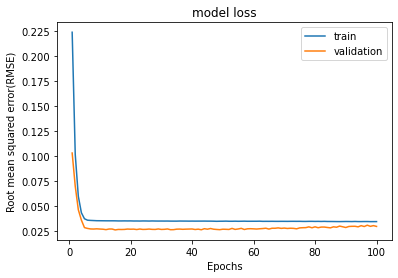

In [85]:
plt.plot(range(1, len(average_RMSE_train) + 1), average_RMSE_train)
plt.plot(range(1, len(average_RMSE_valid) + 1), average_RMSE_valid)
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel('Root mean squared error(RMSE)')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

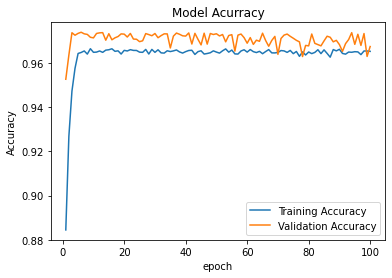

In [88]:
plt.plot(range(1, len(average_Soft_acc_train) + 1), average_Soft_acc_train)
plt.plot(range(1, len(average_Soft_acc_valid) + 1), average_Soft_acc_valid)
plt.title('Model Acurracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [92]:
pred.shape

(1018, 20, 1)

In [93]:
x_test.shape

(1018, 20, 4)

In [94]:
y_test.shape

(1018, 1)